# Logistic Regression

Logistic regression (despite its name) is a supervised classification model.  Recall that in supervised learning we have training data that consists of a set of pairs $\{ \, ( \mathbf{x}_1,y_1 ), ( \mathbf{x}_2,y_2 ) \ldots,  ( \mathbf{x}_m,y_m ) \, \}$, where each $\mathbf{x}_i$ is a feature vector and the target variable $y_i$ is the corresponding label.  In a classification problem, each $y_i$ takes values in a finite unordered set, and we want to find a function $h_\theta$ that takes a feature vector $\mathbf{x}_i$ and tries to predict the target variable $y_i$.  We want this function to generalize as well as possible to new data.  An example of such a function $h_\theta$ would be a spam classifier that takes email data as input and tries to predict whether it is spam or not. 

Often we are interested in estimating the *probability* of a particular label, given some data. In **logistic regression**, we want to model the probability of a class label $y$ given a number of features $x_1, x_2, \ldots, x_n$.  Let's start with the case where the target variable is binary, so $y$ can only take the values 0 or 1.  Given a feature vector $\mathbf{x} = (x_1, \ldots, x_n)^T$, our function $h_\theta(\mathbf{x})$ should estimate the probability that $y$ takes a specfied value in the set $ \{ 0,1 \} $.  For example, financial institutions are interested in predicting whether credit card transactions are fraudulent.  It is more valuable to have an estimate of the probability that a transaction is fraudulent, rather than a classification of fraudulent or not.  In such a model, 0 could represent 'not fraudulent' and 1 could represent 'fraudulent', and the function $h_\theta$ would predict the probability that a credit card transaction is fraudulent based on some features $\mathbf{x}$.

So what is a good candidate for a function $h_\theta$? We could try to mimic linear regression by attempting to find parameters $\theta_0, \theta_1, \ldots, \theta_n$ in order to fit a linear function of the form

$$ h_\theta(\mathbf{x}) = \theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n \,, $$

but this is not ideal for a few reasons; one of the reasons being that some of the predicted probabilities would fall outside the interval [0,1].  For a discussion, see the text [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) - Section 4.2.  

It turns out that a good model for these probabilities is the **logistic function**

$$ g(z) = \frac{1}{1 + e^{-z}} \,. $$

when $z$ is written as a linear combination of the features  

$$ z = \theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n = \theta^T \mathbf{x} \,. $$  

The logistic function takes values in the unit interval [0,1] and it satisfies

$$ \lim_{z \rightarrow -\infty} g(z) = 0 \quad \mathrm{and} \quad \lim_{z \rightarrow \infty} g(z) = 1 \,. $$

A graph of the logistic function is shown below

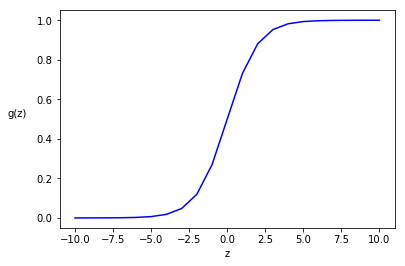

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logistic(z):
    
    return 1 / (1 + np.exp(-z))

# plot the function
x = np.arange(-10, 11)
plt.plot(x, logistic(x), color = 'blue')
plt.xlabel('z')
plt.ylabel('g(z)', rotation = 0, labelpad = 20)
plt.show()

Now let's define the function $h_\theta$ ( the function we want our algorithm to learn ) as follows:

$$ h_\theta(\mathbf{x}) = g(\theta^T \mathbf{x}) = \frac{1}{1 + e^{ \, -\theta^T \mathbf{x}} } \,. $$

This function $h_\theta$ will model the probability of a class label $y = 1$ given the feature vector $\mathbf{x}$, and parametrized by $\theta$

$$ P(y = 1 \,|\, \mathbf{x} ; \theta) = h_\theta(\mathbf{x}) \,. $$

Since there are only two classes ( 0 and 1 ), the probability that $y = 0$, given $\mathbf{x}$ and parametrized by $\theta$, can be written as

$$ P(y = 0 \,|\, \mathbf{x} ; \theta) = 1 - h_\theta(\mathbf{x}) \,. $$

An important thing to note is that we are treating $\mathbf{x}$ as a multivariate random variable and $\theta$ as a vector of parameters that we are trying to estimate.  Observe that we can write
 
$$ P(y \,|\, \mathbf{x} ; \theta) = h_\theta(\mathbf{x})^y (1 - h_\theta(\mathbf{x}))^{1-y} \,, \qquad (1) $$

since $y$ can only be one of the two values 0 or 1.  Now suppose that we have $m$ training examples $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_m$ that we put as the rows of a feature matrix $X$, and we also have the target vector $\mathbf{y}$ that holds the $m$ labels

$$
X =
\begin{bmatrix}
\, - \,\, \mathbf{x}_1^T - \, \\
\, - \,\, \mathbf{x}_2^T - \, \\
\vdots \\
\, - \,\, \mathbf{x}_m^T - \,
\end{bmatrix} \, , \quad
\mathbf{y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$ 
<br/>

Using the matrix $X$ and the vector $\mathbf{y}$, the probability of the data is written as 

$$ P(\mathbf{y} \,|\, X; \theta) \,. $$  

When $P(\mathbf{y} \,|\, X; \theta)$ is considered as a function of the parameters $\theta = (\theta_0, \theta_1, \ldots, \theta_n)^T$, then we give this function a special name, the **likelihood function** ( see [here](https://en.wikipedia.org/wiki/Likelihood_function) ).  The notation we use is

$$ L(\theta) = P(\mathbf{y} \,|\, X; \theta) \,. $$

Our goal is to find $\theta_0, \theta_1, \ldots, \theta_n$ that maximize the likelihood function $L(\theta)$.  This is how we will derive the supervised learning algorithm for logistic regression.

But let's take a break from this and describe an example we will work through.  This example comes from one of the programming exercises in Andrew Ng's machine learning course.  An administrator of a university department wants to determine each applicant's chance of admission based on their results from two exams.  The administrator has [data](https://github.com/marty-vanhoof/Maching_Learning/blob/master/data/logReg_data1.txt) consisting of previous applicant's exam scores and whether they were admitted to the university of not.  Let's look at the data

In [3]:
import os
import pandas as pd

# load the dataframe and display first 5 rows
filepath = os.getcwd() + '/logReg_data1.txt'
df = pd.read_csv(filepath, names = ['exam1', 'exam2', 'admitted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Our training data has two features:  ```exam1``` and ```exam2```, and these features are both continuous variables.   The target variable is called ```admitted```, and this is a categorical variable consisting of the labels 0 or 1 (0 means that the applicant was not admitted and 1 means that the applicant was admitted).  We will use this data to build a model that estimates the probability that an applicant will be admitted to the university, given their scores on the two exams.

### Boxplot

Boxplots give a graphical display of five important statistics associated with any distribution:  the minimum, 25th percentile, median, 75th percentile, and maximum.  They can be very useful for comparing the distributions of continuous variables across different categories.  In this case, we are comparing the distributions of scores for ```exam1``` and ```exam2``` based on whether the applicant was admitted or not.  

The boxplots below show that the distributions of exam scores for applicants who were admitted/not admitted are skewed relative to each other.  We can see that applicants who were admitted to the university have higher exam scores (on average) than those who were not admitted. 

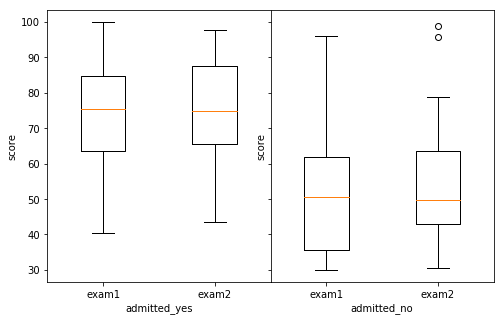

In [4]:
# split the data into 'admitted_yes', 'admitted_no'
admitted_yes = df[ df.admitted == 1 ]
admitted_no = df[ df.admitted == 0 ]
data = [admitted_yes, admitted_no]
xlabels = ['admitted_yes', 'admitted_no']

# make the plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5), sharey = True)
fig.subplots_adjust(wspace = 0)
for i in range(0,2):
    ax[i].boxplot( [data[i].exam1, data[i].exam2], widths = [0.4, 0.4] )
    ax[i].set( xticklabels = ['exam1', 'exam2'], xlabel = xlabels[i], ylabel = 'score' )

### Scatterplot

The scatterplot below seems to suggest that if some function of the exam scores is above a certain threshold, then the applicant will be admitted.  We would like to trace out a boundary between the two classes that will classify the data into 'admitted_yes' or 'admitted_no'.  This boundary is called a **decision boundary**, and logistic regression will help us find the decision boundary and make class predictions.

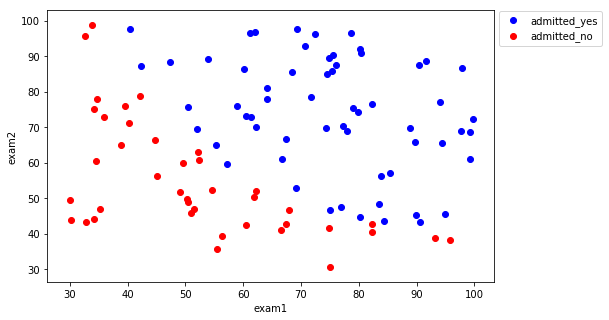

In [5]:
fig, ax = plt.subplots(figsize = (8,5))

plt.scatter(admitted_yes.exam1, admitted_yes.exam2, color = 'blue', label = 'admitted_yes')
plt.scatter(admitted_no.exam1, admitted_no.exam2, color = 'red', label = 'admitted_no')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend(bbox_to_anchor = (1,0.85), loc = 3)
plt.show()

### Gradient Descent Returns

We want to find an algorithm that will learn the parameters $\theta = (\theta_0, \theta_1, \ldots, \theta_n)^T$ in order to maximize the likelihood function

$$ L(\theta) = P(\mathbf{y} \,|\, X; \theta) $$

Let's assume that our $m$ training examples are *independent*, so that

\begin{align*} 
P(\mathbf{y} \,|\, X; \theta) &= \prod_{i=1}^m P(y_i \,|\, \mathbf{x}_i; \theta) \\
                              &= \prod_{i=1}^m h_\theta(\mathbf{x}_i)^{y_i} (1 - h_\theta(\mathbf{x}_i))^{1 - y_i} \,,
\end{align*}
where the last equality is due to (1) above.